<a href="https://colab.research.google.com/github/Alyn3103/AI-Projects/blob/main/NextWordPrediction/LSTMNEWONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
import os
import string
import requests

# Pre Processing Data and Tokenization


In [ ]:
Dracula = "/content/drive/MyDrive/MLPAPER/Dracula.txt"
raw_text = open(Dracula, 'r', encoding='utf-8').read()  #incase it isnt in utf8
raw_text = raw_text.lower()                             # convert in lower  for easy training
print(raw_text[0:1000])

﻿the project gutenberg ebook of dracula, by bram stoker

this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online at
www.gutenberg.org. if you are not located in the united states, you
will have to check the laws of the country where you are located before
using this ebook.

title: dracula

author: bram stoker

release date: october, 1995 [ebook #345]
[most recently updated: march 27, 2023]

language: english


produced by: chuck greif and the online distributed proofreading team

*** start of the project gutenberg ebook dracula ***




                                dracula

                                  _by_

                              bram stoker

                        [illustration: colophon]

                                new york

                

In [ ]:
data = raw_text.split('\n')
data[0]

'\ufeffthe project gutenberg ebook of dracula, by bram stoker'

In [ ]:
data = data[119:]   #The text file contains a header file before the actual data begins. The actual data begins from line 119 so cut em
data[0]

'vienna early next morning; should have arrived at 6:46, but train was an'

In [ ]:
len(data)

15751

In [ ]:
data = " ".join(data)
data[:1000]

'vienna early next morning; should have arrived at 6:46, but train was an hour late. buda-pesth seems a wonderful place, from the glimpse which i got of it from the train and the little i could walk through the streets. i feared to go very far from the station, as we had arrived late and would start as near the correct time as possible. the impression i had was that we were leaving the west and entering the east; the most western of splendid bridges over the danube, which is here of noble width and depth, took us among the traditions of turkish rule.  we left in pretty good time, and came after nightfall to klausenburgh. here i stopped for the night at the hotel royale. i had for dinner, or rather supper, a chicken done up some way with red pepper, which was very good but thirsty. (_mem._, get recipe for mina.) i asked the waiter, and he said it was called "paprika hendl," and that, as it was a national dish, i should be able to get it anywhere along the carpathians. i found my smatter

In [ ]:
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans('', '', string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens

tokens = clean_text(data)
print(tokens[:50])

['vienna', 'early', 'next', 'morning', 'should', 'have', 'arrived', 'at', 'but', 'train', 'was', 'an', 'hour', 'late', 'budapesth', 'seems', 'a', 'wonderful', 'place', 'from', 'the', 'glimpse', 'which', 'i', 'got', 'of', 'it', 'from', 'the', 'train', 'and', 'the', 'little', 'i', 'could', 'walk', 'through', 'the', 'streets', 'i', 'feared', 'to', 'go', 'very', 'far', 'from', 'the', 'station', 'as', 'we']


In [ ]:
len(tokens)

163018

In [ ]:
len(set(tokens))

10692

In [ ]:
length = 50 + 1
lines = []

for i in range(length, len(tokens)):
  seq = tokens[i-length:i]
  line = ' '.join(seq)
  lines.append(line)
  if i > 200000:
    break

print(len(lines))

162967


In [ ]:
lines[0]  # this line consist of 51 words ,50 to use and 51st to predict

'vienna early next morning should have arrived at but train was an hour late budapesth seems a wonderful place from the glimpse which i got of it from the train and the little i could walk through the streets i feared to go very far from the station as we had'

In [ ]:
tokens[50] #this will be predicted

'had'

In [ ]:
lines[1] # each line we will hop by one word

'early next morning should have arrived at but train was an hour late budapesth seems a wonderful place from the glimpse which i got of it from the train and the little i could walk through the streets i feared to go very far from the station as we had arrived'

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [ ]:
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:,-1]
X[0]

array([10692,   483,   440,   212,   119,    28,   791,    25,    27,
         482,    11,    69,   347,   321,  2121,   273,     6,   607,
         167,    38,     1,  1879,    36,     3,   145,     5,    10,
          38,     1,   482,     2,     1,   140,     3,    45,   913,
         111,     1,  2966,     3,   586,     4,    83,    85,   219,
          38,     1,   878,    12,    13])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
seq_length = X.shape[1]
seq_length

50

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            534650    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 10693)             1079993   
                                                                 
Total params: 1,765,543
Trainable params: 1,765,543
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X, y, batch_size = 256, epochs = 150)

Epoch 1/150
637/637 [==============================] - 72s 95ms/step - loss: 6.5315 - accuracy: 0.0487
Epoch 2/150
637/637 [==============================] - 21s 33ms/step - loss: 6.0605 - accuracy: 0.0687
Epoch 3/150
637/637 [==============================] - 17s 27ms/step - loss: 5.8323 - accuracy: 0.0869
Epoch 4/150
637/637 [==============================] - 15s 24ms/step - loss: 5.6395 - accuracy: 0.1021
Epoch 5/150
637/637 [==============================] - 15s 24ms/step - loss: 5.4987 - accuracy: 0.1105
Epoch 6/150
637/637 [==============================] - 14s 22ms/step - loss: 5.3764 - accuracy: 0.1167
Epoch 7/150
637/637 [==============================] - 14s 22ms/step - loss: 5.2673 - accuracy: 0.1221
Epoch 8/150
637/637 [==============================] - 13s 20ms/step - loss: 5.1598 - accuracy: 0.1259
Epoch 9/150
637/637 [==============================] - 14s 21ms/step - loss: 5.0599 - accuracy: 0.1302
Epoch 10/150
637/637 [==============================] - 13s 20ms/step - l

In [ ]:
seed_text=lines[12421]  #random line
seed_text

'we threw off the hungarian yoke we of the dracula blood were amongst their leaders for our spirit would not brook that we were not free ah young sir the szekelysand the dracula as their hearts blood their brains and their swordscan boast a record that mushroom growths like the hapsburgs'

In [ ]:
def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
  text = []

  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen = text_seq_length, truncating='pre')

    y_predict = np.argmax(model.predict(encoded), axis=-1)

    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if index == y_predict:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    text.append(predicted_word)
  return ' '.join(text)

In [ ]:
generate_text_seq(model, tokenizer, seq_length, seed_text, 100)

1/1 [==============================] - 0s 21ms/step


'and the romanoffs can never reach the warlike days are over blood is too precious a thing as youre doing john in the early opposite us why had particular door should have been of time devils and i sometimes seemed to become conscious of our purpose his face began to get his screwdriver and along the air i could not believe that it was a strange old children means in fear and advertise it back to me saying jonathan harker i shall put into wile here the time we are all right and see and of course that this be'

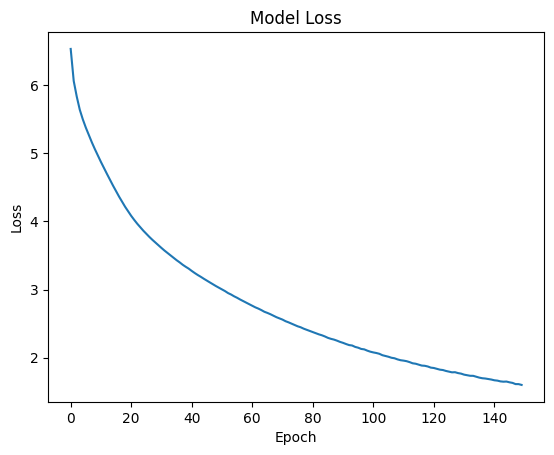

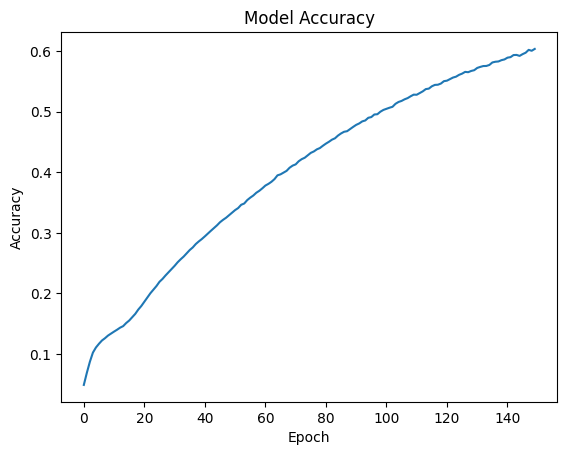

In [ ]:

import matplotlib.pyplot as plt

# Plot loss vs epoch
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()